# TP1 de MCS

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from random import randrange

## Partie I

In [4]:
def DTW(w0, w1, w2, seq1, seq2, d):
  I, J = seq2.shape[0], seq1.shape[0]
  
  g = np.empty((I+1,J+1))
  g.fill(None)
  
  g[0][0] = 0
  
  
  for j in range(1,J+1):
    g[0][j] = np.Infinity
  
  for i in range(1,I+1):
    g[i][0] = np.Infinity

    for j in range(1,J+1):
       g[i][j] = min(g[i-1][j]+d(seq2[i-1],seq1[j-1])*w0, g[i-1][j-1]+d(seq2[i-1],seq1[j-1])*w1, g[i][j-1]+d(seq2[i-1],seq1[j-1])*w2)

  
  #print(g)
  score = g[I][J]/(I+J)
  #print(f'score: {score}')
  
  return score 

Définition des fonctions de distance

In [5]:
D = {('X', 'X'): 0, ('X', 'C'): 1, ('X', 'U'): 1, ('X', 'U_X'): 1, ('X', 'V'): 2,
     ('C', 'X'): 1, ('C', 'C'): 0, ('C', 'U'): 1, ('C', 'U_X'): 1, ('C', 'V'): 2, 
     ('U', 'X'): 1, ('U', 'C'): 1, ('U', 'U'): 0, ('U', 'U_X'): 1, ('U', 'V'): 1, 
     ('U_X', 'X'): 1, ('U_X', 'C'): 1, ('U_X', 'U'): 1, ('U_X', 'U_X'): 0, ('U_X', 'V'): 2,
     ('V', 'X'): 2, ('V', 'C'): 2, ('V', 'U'): 1, ('V', 'U_X'): 2, ('V', 'V'): 0}


vect = lambda i, j: np.linalg.norm(i-j)
absolue = lambda i, j: abs(i-j)
euclidienne = lambda i, j: sqrt(i**2 + j**2)
adn = lambda i, j: i!=j
son = lambda i, j: D[(i,j)]

Test avec l'exemple du cours



In [6]:
seq1 = np.array([1,0,2,3])
seq2 = np.array([-1,1,0])

DTW(1, 1, 1, seq1, seq2, vect)

1.0

Test avec l'exemple de l'exercice **2.1**

In [7]:
seq1 = np.array([-2,10,-10,15,-13,20,-5,14,2])
seq2 = np.array([3,-13,14,-7,9,-2])

DTW(1, 1, 1, seq1, seq2, vect)

3.6

Test avec l'exemple de l'exercice **2.2**

In [8]:
seq1 = np.array(['A','T','G','G','T','A','C','G','T','C'])
seq2 = np.array(['A','A','G','T','A','G','G','C'])

DTW(1, 1, 1, seq2, seq1, adn)

0.16666666666666666

Test avec l'exemple de l'exercice **2.3**

In [9]:
cinq, vingt, cent = np.array("X V V C X".split()), np.array("U_X V V".split()), np.array("X V V".split())

*Question 1.*

In [10]:
seq1 = np.array("X X V U X C X".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("Le mot 'cinq' est donc reconnu")

0.25 1.0 0.7
Le mot 'cinq' est donc reconnu


*Question 2.*

In [11]:
seq1 = np.array("U_X U_X V X X V U_X X X V".split())

score_seq1_cinq = DTW(1, 2, 1, seq1, cinq, son)
score_seq1_vingt = DTW(1, 2, 1, seq1, vingt, son)
score_seq1_cent = DTW(1, 2, 1, seq1, cent, son)

print(score_seq1_cinq, score_seq1_vingt, score_seq1_cent)
print("En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score")

0.6 0.6153846153846154 0.6153846153846154
En théorie le mot 'cinq' est reconnu mais ils ont tous quasiment le même score


## Partie II

In [12]:
import librosa

In [13]:
m1, sr_m1 = librosa.load("corpus/dronevolant_nonbruite/M01_arretetoi.wav")
f1, sr_f1 = librosa.load("corpus/dronevolant_nonbruite/F01_arretetoi.wav")

mfcc_m1 = librosa.feature.mfcc(y=m1, sr=sr_m1, hop_length=1024, htk=True,
n_mfcc=12)
mfcc_f1 = librosa.feature.mfcc(y=f1, sr=sr_f1, hop_length=1024, htk=True,
n_mfcc=12)

In [14]:
print(mfcc_m1)

[[-5.82703247e+02 -5.84441101e+02 -5.94360962e+02 -5.98286804e+02
  -6.01296265e+02 -6.10077881e+02 -5.15813538e+02 -6.00719849e+02
  -5.46653015e+02 -4.33107391e+02 -2.59153839e+02 -2.06453094e+02
  -2.26242035e+02 -2.54904831e+02 -3.27343536e+02 -2.75069580e+02
  -3.66151062e+02 -3.30313721e+02 -3.05727905e+02 -3.27276093e+02
  -3.36625549e+02 -4.13930176e+02 -5.13463440e+02 -5.42615479e+02
  -5.36260132e+02 -5.51331116e+02 -5.59995850e+02 -5.49711365e+02
  -5.71249329e+02 -5.75309570e+02 -5.53500610e+02 -5.61090149e+02]
 [ 9.14449768e+01  9.78501282e+01  9.16450958e+01  9.35301971e+01
   1.00156937e+02  9.64385147e+01  5.15577850e+01  9.26189270e+01
   6.32244263e+01  1.31172058e+02  2.00667114e+02  1.83460266e+02
   1.89353668e+02  1.93775558e+02  8.64663544e+01  1.33972977e+02
   1.41400330e+02  5.32687492e+01  1.64746841e+02  2.08834335e+02
   2.01209793e+02  1.79474777e+02  1.27404526e+02  9.86358795e+01
   8.70318298e+01  8.79614563e+01  1.05165230e+02  1.09768906e+02
   1.0632

In [15]:
print(mfcc_f1)

[[-6.02568848e+02 -5.91266602e+02 -6.30422607e+02 -6.46613037e+02
  -6.37142639e+02 -6.37689087e+02 -6.39994751e+02 -5.55466980e+02
  -5.94212219e+02 -5.59685303e+02 -4.49246277e+02 -2.41313873e+02
  -2.07182587e+02 -2.01665634e+02 -2.57922150e+02 -2.33031952e+02
  -2.40259415e+02 -4.04098480e+02 -2.99308868e+02 -2.97825562e+02
  -3.47568970e+02 -3.60120056e+02 -3.15327698e+02 -3.63239807e+02
  -2.85519318e+02 -2.55848877e+02 -3.00502991e+02 -3.94900757e+02
  -4.24153748e+02 -4.45599060e+02 -4.76202515e+02 -5.13023315e+02
  -5.36672607e+02 -5.58440308e+02 -5.71529419e+02 -5.94083130e+02
  -5.83995972e+02 -5.88043640e+02 -6.19254639e+02]
 [ 7.84028778e+01  6.92165070e+01  6.26591644e+01  6.21968079e+01
   6.99450150e+01  7.07553558e+01  6.78752747e+01  5.23285370e+01
   4.59454651e+01  2.53440933e+01  9.17251129e+01  1.09769943e+02
   8.25562897e+01  9.38121109e+01  1.09518829e+02  6.31089745e+01
   8.93754425e+01  1.19636162e+02  5.74385834e+01  7.75280075e+01
   1.15186035e+02  4.2763

In [16]:
DTW(1,2,1,mfcc_m1.transpose(),mfcc_f1.transpose(), vect)

75.90145514044963

In [17]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

### Création des variables de manipluation des fichiers

In [18]:
actions = ["arretetoi","atterrissage","avance","decollage","droite","etatdurgence","faisunflip","gauche","plusbas","plushaut","recule","tournedroite","tournegauche"]

IDs_M_nonbruite = ['M%.2d'%i for i in range(1, 14)]
IDs_F_nonbruite = ['F%.2d'%i for i in range(1, 6)]

IDs_M_bruite = ['M%.2d'%i for i in range(1, 5)]
IDs_F_bruite = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_M_test = ['M%.2d'%i for i in range(1,2)]
IDs_F_test = ['F%.2d'%i for i in range(0)] #Pas d'exemple féminin présents

IDs_nonbruite = IDs_M_nonbruite + IDs_F_nonbruite
IDs_bruite = IDs_M_bruite + IDs_F_bruite
IDs_test = IDs_M_test + IDs_F_test


IDs = {"nonbruite": IDs_nonbruite,
        "bruite": IDs_bruite,
        "test": IDs_test}

#### Fonction de génération du chemin d'un fichier (Linux)

In [19]:
def gen_path(typeSon, ID, action):
    chemin = ""
    
    if typeSon == "nonbruite":
        chemin = "corpus/dronevolant_nonbruite"
    elif typeSon == "bruite":
        chemin = "corpus/dronevolant_bruite"
    elif typeSon == "test":
        chemin = "corpus_test"
        
    chemin += f"/{ID}_{action}.wav"
    
    return chemin

#### Fonction de génération du chemin d'un fichier aléatoire 

In [20]:
def gen_random_path(typeSon):
    selected_IDs = IDs[typeSon]
    return gen_path(typeSon, selected_IDs[randrange(len(selected_IDs))], actions[randrange(len(actions))])

## Plot de chaque commande

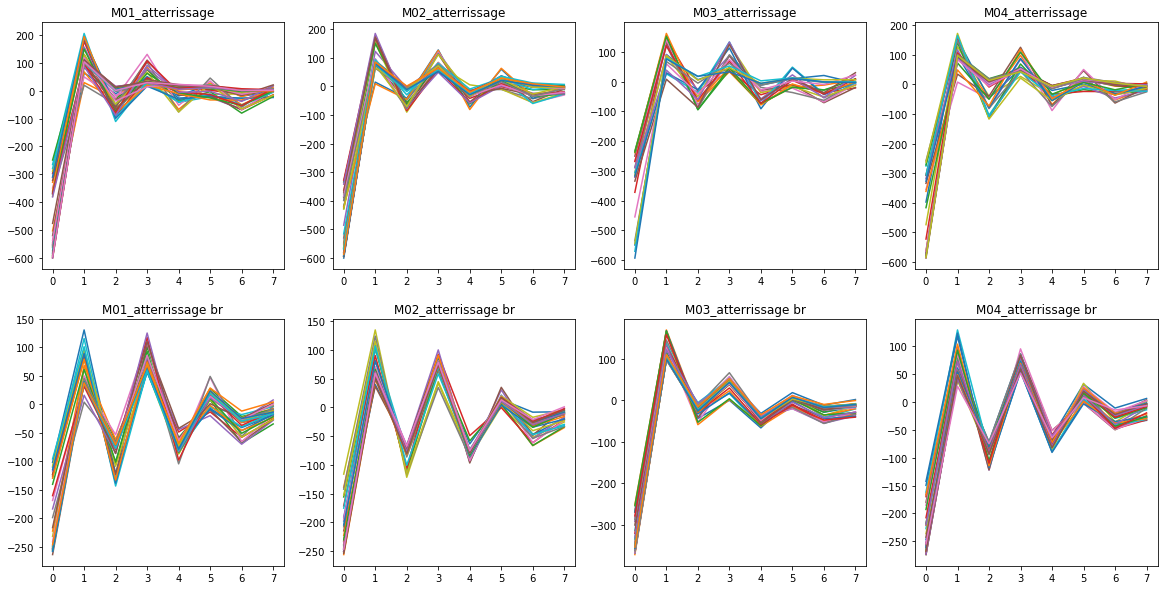

In [21]:
for action in actions[1:2]:
    for i,ID in enumerate(IDs["nonbruite"][:4]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        plt.subplot(2,4, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc)
        

for action in actions[1:2]:
    for i,ID in enumerate(IDs["bruite"][:4]):
        y, sr = librosa.load(gen_path("bruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        plt.subplot(2,4, 4+i+1)
        plt.title(f'{ID}_{action} br')
        plt.plot(mfcc)

plt.show()

### Comparer les différents coefficients du mfcc

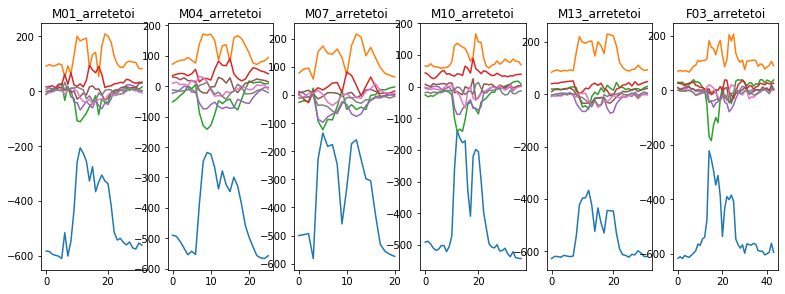

In [22]:
plt.clf()

for action in actions[:1]:
    for i,ID in enumerate(IDs_nonbruite[::3]):
        y, sr = librosa.load(gen_path("nonbruite", ID, action))
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
        n_mfcc=8)
        
        
        
        plt.subplot(2,len(IDs["nonbruite"])/2, (i+1))
        plt.title(f'{ID}_{action}')
        plt.plot(mfcc.transpose())


plt.show()

### Comparaison d'une MFCC donnée avec toutes les autres dans le but de retrouver la commande donnée initialement

#### Fonction pour la comparaison

In [23]:
def compare_mfcc(filepath):
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=8)

    results = []

    max_details_len = 0

    for typeSon in IDs:
        for ID in IDs[typeSon]:
            for action in actions:
                filename = gen_path(typeSon, ID, action)
                if filename != action_to_find:
                    y, sr = librosa.load(filename)

                    mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=8)

                    action_details = f"{typeSon} {action} ({ID})" 

                    if len(action_details) > max_details_len:
                        max_details_len = len(action_details)

                    results.append((action_details, DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)))


    results.sort(key=lambda k:k[1])

    for i, (action, result) in enumerate(results):
        print(f'{i+1}:\t{action:<{max_details_len}}\t|\t{result}')
    print()

    print(f'La commande donnée est donc probablement {results[0][0].split()[1]}')


In [22]:
action_to_find = gen_random_path("nonbruite")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

corpus/dronevolant_nonbruite/F04_avance.wav

1:	nonbruite avance (F02)      	|	43.16147956332645
2:	nonbruite tournedroite (M06)	|	49.06987475277333
3:	nonbruite avance (M05)      	|	52.24899017978722
4:	nonbruite atterrissage (F04)	|	52.64825277550276
5:	nonbruite tournedroite (F04)	|	52.71626882199888
6:	nonbruite etatdurgence (M06)	|	53.429528342352974
7:	nonbruite etatdurgence (F04)	|	53.438346485758935
8:	nonbruite decollage (F04)   	|	53.55802785507356
9:	nonbruite plushaut (F04)    	|	55.24935779374899
10:	nonbruite gauche (F04)      	|	55.45612113540237
11:	nonbruite droite (M01)      	|	55.88971960040885
12:	nonbruite recule (F04)      	|	55.956345001856484
13:	nonbruite avance (M06)      	|	57.29509847731817
14:	nonbruite avance (M01)      	|	57.74323194799289
15:	nonbruite decollage (F05)   	|	57.83224617807489
16:	nonbruite tournedroite (M03)	|	58.16101400779955
17:	nonbruite arretetoi (F04)   	|	58.288221015486606
18:	nonbruite etatdurgence (F05)	|	59.260373716001155
19:	n

#### Fonction de comparaison montrant la commande la plus probable pour chaque voix

In [36]:
def compare_mfcc_voices(filepath):
    
    y_son, sr_son = librosa.load(filepath)

    mfcc_son_a_decouvrir = librosa.feature.mfcc(y=y_son, sr=sr_son, hop_length=1024, htk=True,
            n_mfcc=8)

    results = dict()

    max_details_len = 0 
        
    for typeSon in IDs:
        for ID in IDs[typeSon]:
            dtw_min_score = 10**5
            dtw_min_action = ""

            for action in actions:
                filename = gen_path(typeSon, ID, action)
                
                if filename != filepath:
                    y, sr = librosa.load(filename)

                    mfcc_test = librosa.feature.mfcc(y=y, sr=sr, hop_length=1024, htk=True,
                    n_mfcc=8)

                    action_details = f"{typeSon} {ID}"
                    action_display = action_details +" "+ action

                    if len(action_display)+1 > max_details_len:
                        max_details_len = len(action_display)

                    dtw_score = DTW(1,2,1,mfcc_son_a_decouvrir.transpose(), mfcc_test.transpose(), vect)

                    if dtw_score < dtw_min_score:
                        dtw_min_score = dtw_score
                        results[action_details] = (action, dtw_min_score)
    
    for key in sorted(results.keys(), key=lambda k: results[k][1]):
        action, result = results[key]
        action_dsp = f'{key}: {action}'
        print(f'{action_dsp:<{max_details_len}}\t|\t{result}')
    print()
   

corpus_test/M01_atterrissage.wav

nonbruite M05 decollage   	|	59.53539655585038
test M01 decollage        	|	62.00590792408696
nonbruite M12 gauche      	|	64.17174091935158
nonbruite M10 gauche      	|	71.12474857677113
nonbruite M08 faisunflip  	|	73.34871098692987
nonbruite F03 recule      	|	73.5285042238907
nonbruite M09 atterrissage	|	73.62968916812186
nonbruite M06 faisunflip  	|	77.53498969206939
nonbruite M01 gauche      	|	78.89075657472772
nonbruite F05 faisunflip  	|	80.76216681528899
nonbruite M13 decollage   	|	81.22607289189878
nonbruite M07 faisunflip  	|	82.26221021016438
nonbruite M03 faisunflip  	|	85.90466338512944
nonbruite M04 plusbas     	|	86.02572560310364
nonbruite F01 gauche      	|	86.31990296912916
nonbruite M02 faisunflip  	|	93.14558904679095
nonbruite F02 tournedroite	|	95.99628842887232
nonbruite F04 plushaut    	|	98.9470098076797
nonbruite M11 recule      	|	99.87904409634865
bruite M01 plusbas        	|	103.06327104568481
bruite M03 faisunflip     	

In [37]:
action_to_find = gen_random_path("nonbruite")

print(action_to_find, end="\n\n")

compare_mfcc_voices(action_to_find)

corpus/dronevolant_nonbruite/M06_tournedroite.wav

nonbruite F04 tournedroite	|	42.11019696745762
nonbruite M01 droite      	|	42.57781593423141
nonbruite M06 droite      	|	43.42139453076302
nonbruite F05 decollage   	|	48.06323070290648
nonbruite M05 avance      	|	48.98245869184795
nonbruite F03 droite      	|	52.39735988994221
nonbruite M04 recule      	|	52.94308617996843
nonbruite M02 tournedroite	|	54.67678857984997
nonbruite M09 etatdurgence	|	54.72599978505829
nonbruite M13 faisunflip  	|	55.342849401780114
nonbruite F02 plushaut    	|	55.53940285308452
nonbruite M03 etatdurgence	|	56.024597920869525
nonbruite M11 tournedroite	|	57.78256127947853
nonbruite F01 plushaut    	|	60.86914487428303
nonbruite M08 plusbas     	|	63.73339537499656
nonbruite M10 droite      	|	66.237200337787
nonbruite M12 faisunflip  	|	83.23110655851143
nonbruite M07 faisunflip  	|	87.45159976583132
test M01 avance           	|	94.64492694751637
bruite M03 faisunflip     	|	102.8595414842878
bruite M0

### Test avec le corpus de voix perso

In [23]:
action_to_find = gen_random_path("test")

print(action_to_find, end="\n\n")

compare_mfcc(action_to_find)

corpus_test/M01_faisunflip.wav

1:	nonbruite faisunflip (M12)  	|	57.2638398706913
2:	nonbruite recule (M05)      	|	59.56851243136222
3:	nonbruite plushaut (M05)    	|	61.09084491406457
4:	nonbruite plushaut (M12)    	|	63.267066654406094
5:	nonbruite decollage (M05)   	|	63.58488981185421
6:	nonbruite plusbas (M10)     	|	66.12987806085954
7:	nonbruite faisunflip (M07)  	|	66.49481609889439
8:	nonbruite plusbas (M12)     	|	66.65924580891927
9:	nonbruite faisunflip (M06)  	|	67.06769794887967
10:	nonbruite faisunflip (M08)  	|	67.45186675804248
11:	nonbruite recule (M12)      	|	67.60196301088494
12:	test atterrissage (M01)     	|	68.0294739833245
13:	nonbruite recule (F03)      	|	68.47340857464334
14:	nonbruite tournedroite (M10)	|	69.50402507497303
15:	nonbruite faisunflip (M05)  	|	69.60767196206486
16:	nonbruite gauche (M12)      	|	70.10024833679199
17:	nonbruite plushaut (M10)    	|	70.53407853649509
18:	nonbruite plusbas (M05)     	|	70.74246877239597
19:	test plusbas (M01)  

In [38]:
action_to_find = gen_random_path("test")

print(action_to_find, end="\n\n")

compare_mfcc_voices(action_to_find)

corpus_test/M01_recule.wav

nonbruite M05 recule      	|	68.73161259403935
test M01 arretetoi        	|	69.75612445407444
nonbruite M12 recule      	|	76.67584323883057
nonbruite M07 recule      	|	78.91505946669467
nonbruite M09 recule      	|	79.70416044152302
nonbruite M08 recule      	|	79.8710178092674
nonbruite M10 recule      	|	80.26006766727993
nonbruite M06 plusbas     	|	80.63325763393092
nonbruite M13 avance      	|	84.01208346230644
bruite M03 etatdurgence   	|	84.88091465684234
nonbruite M01 recule      	|	84.98068639210292
nonbruite F03 recule      	|	87.25863508744673
nonbruite M04 plushaut    	|	90.89420819282532
nonbruite M11 recule      	|	92.90233993530273
nonbruite F05 plushaut    	|	95.87465633664813
nonbruite M03 recule      	|	96.87073969286541
nonbruite F04 droite      	|	96.98239001105813
nonbruite F02 tournedroite	|	101.22432016443324
nonbruite M02 plushaut    	|	103.98813978830974
nonbruite F01 recule      	|	110.34231425139863
bruite M01 plusbas        	|	1